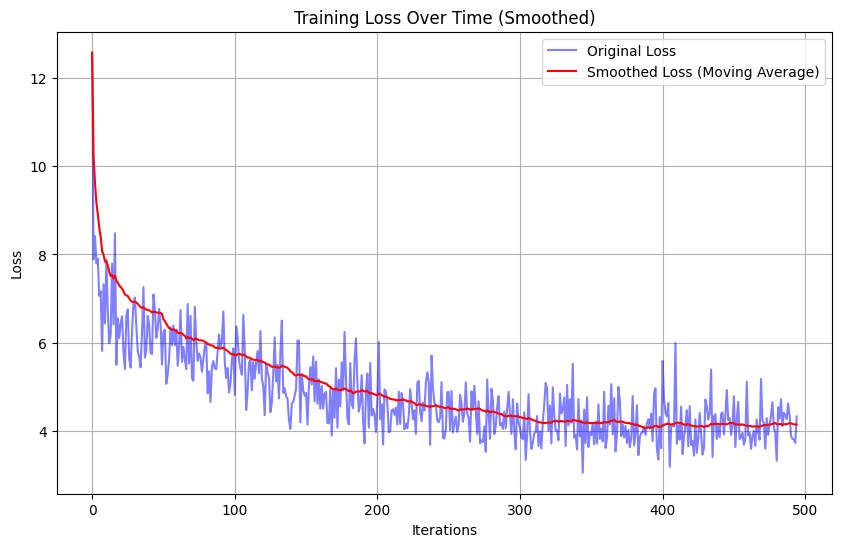

In [1]:
import re
import matplotlib.pyplot as plt
import numpy as np

# 로그 파일 경로
log_file_path = '/home/ailab/git/Team_3/baseline_code_and_model/03_3D객체검출차량용/02_baseline_code_and_model/output/waymo_models/dsvt_voxel_whole/default/train_20241025-205654.log'
path_64ver2 = '/home/ailab/git/Team_3/baseline_code_and_model/03_3D객체검출차량용/02_baseline_code_and_model/output/waymo_models/dsvt_voxel_64_ver2/default/train_20241029-171203.log'
path_label_3='/home/ailab/git/Team_3/baseline_code_and_model/03_3D객체검출차량용/02_baseline_code_and_model/output/waymo_models/dsvt_voxel_label_3/default/train_20241029-171757.log'
path_64ver='/home/ailab/git/Team_3/baseline_code_and_model/03_3D객체검출차량용/02_baseline_code_and_model/output/waymo_models/dsvt_voxel_64_ver2/default/train_20241029-171203.log'

pillar_datachange='/home/ailab/git/Team_3/baseline_code_and_model/03_3D객체검출차량용/02_baseline_code_and_model/output/waymo_models/dsvt_pillar_whole_datachange/default/train_20241031-180552.log'
# Loss 값을 저장할 리스트

#파일 입력
file_path = pillar_datachange

loss_values = []
# 로그 파일 읽기
with open(file_path, 'r') as file:
    for line in file:
        # Loss 값 추출 (예: Loss: 3.318)
        match = re.search(r'Loss:\s([0-9]*\.[0-9]+)', line)
        if match:
            loss_value = float(match.group(1))
            loss_values.append(loss_value)

def moving_average(data, window_size=50):
    moving_averages = []
    
    for i in range(len(data)):
        if i < window_size:
            # 처음부터 i까지의 평균
            window_data = data[:i + 1]
        else:
            # i-50부터 i까지의 평균
            window_data = data[i - window_size + 1:i + 1]
        
        # 평균 계산
        moving_avg = np.mean(window_data)
        moving_averages.append(moving_avg)
    
    return moving_averages

# 이동 평균 적용
smoothed_loss_values = moving_average(loss_values, window_size=50)

# Loss 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(loss_values, label='Original Loss', color='b', alpha=0.5)
plt.plot( smoothed_loss_values, label='Smoothed Loss (Moving Average)', color='r')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss Over Time (Smoothed)')
plt.legend()
plt.grid()
plt.show()

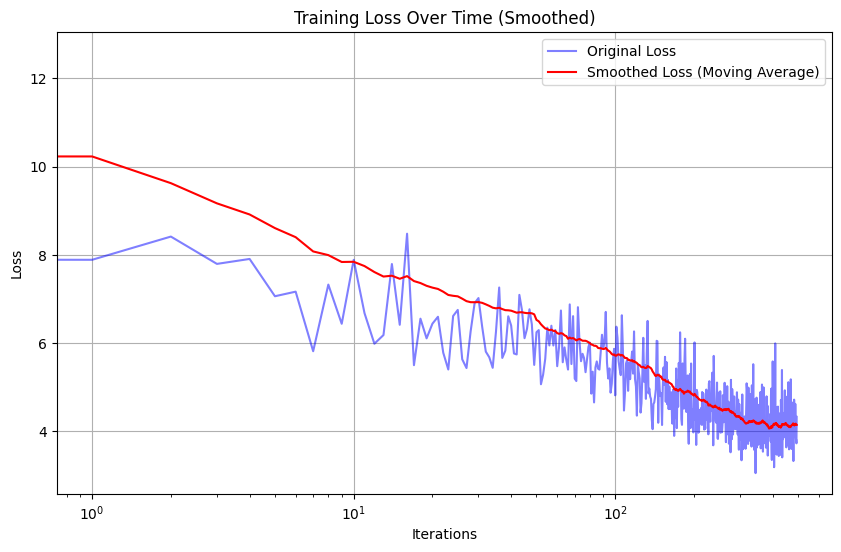

In [2]:

# logscale그래프
plt.figure(figsize=(10, 6))
plt.plot(loss_values, label='Original Loss', color='b', alpha=0.5)
plt.plot( smoothed_loss_values, label='Smoothed Loss (Moving Average)', color='r')
plt.xscale('log')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss Over Time (Smoothed)')
plt.legend()
plt.grid()
plt.show()